In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('D:\\Machine-Learning-Project-2023.2\\data\\label_encode_processed_data.csv')

In [4]:
x = data.drop('price_in_USD', axis=1)
y = data['price_in_USD']

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.1, random_state=30)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=30)

print(f'Training set size (X_train): {X_train.shape}')
print(f'Training set size (y_train): {y_train.shape}')
print(f'Validation set size (X_val): {X_val.shape}')
print(f'Validation set size (y_val): {y_val.shape}')
print(f'Test set size (X_test): {X_test.shape}')
print(f'Test set size (y_test): {y_test.shape}')

Training set size (X_train): (40808, 6)
Training set size (y_train): (40808,)
Validation set size (X_val): (2268, 6)
Validation set size (y_val): (2268,)
Test set size (X_test): (2267, 6)
Test set size (y_test): (2267,)


In [6]:
'''
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_k = grid_search.best_params_['n_neighbors']
print(f'Optimal number of neighbors: {best_k}')
'''
'''
param_grid = {'n_neighbors': range(1, 31)}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best hyperparameter
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter value
best_k = grid_search.best_params_['n_neighbors']
print(f'Optimal number of neighbors: {best_k}')




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
'''
knr = KNeighborsRegressor(n_neighbors=4,weights= 'uniform')
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [7]:
# Evaluate the model using the validation set
y_val_pred = knr.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')


Validation MSE: 7510424876.3412695


In [8]:
# Test the final model using the test set
y_test_pred = knr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

Test MSE: 10127825690.673136


In [9]:
pred_table = pd.DataFrame(data={"actual value":y_test, "predicted":knr.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
18850,108000.0,121500.0,-13500.0
23157,66000.0,63900.0,2100.0
21979,73800.0,73884.0,-84.0
13766,133200.0,109800.0,23400.0
1149,162000.0,159000.0,3000.0
...,...,...,...
3617,594000.0,943500.0,-349500.0
10971,450000.0,379500.0,70500.0
41975,138000.0,111000.0,27000.0
29109,64800.0,77100.0,-12300.0


In [10]:
from sklearn.metrics import r2_score

pred_train = knr.predict(X_train)
pred_val = knr.predict(X_val)
pred_test = knr.predict(X_test)

# Predict on training set
training_accuracy = r2_score(y_train, pred_train)

# Predict on validation set
validation_accuracy = r2_score(y_val, pred_val)

# Predict on test set
test_accuracy = r2_score(y_test, pred_test)

print(f'Training Accuracy: {training_accuracy:.2f}')
print(f'Validation Accuracy: {validation_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.87
Validation Accuracy: 0.82
Test Accuracy: 0.82


In [11]:
results = []
for k in range(1, 11):
    for w in ['uniform', 'distance']:
        #print("STT: ", k)
        knr = KNeighborsRegressor(n_neighbors=k,weights= w)
        knr.fit(X_train, y_train)
        #print(f'Test MSE: {test_mse}')
        pred_train = knr.predict(X_train)
        pred_val = knr.predict(X_val)
        pred_test = knr.predict(X_test)
        
        # Predict on training set
        training_accuracy = r2_score(y_train, pred_train)
        
        # Predict on validation set
        validation_accuracy = r2_score(y_val, pred_val)
        
        # Predict on test set
        test_accuracy = r2_score(y_test, pred_test)
        
        #print(f'Training Accuracy: {training_accuracy:.2f}')
        #print(f'Validation Accuracy: {validation_accuracy:.2f}')
        #print(f'Test Accuracy: {test_accuracy:.2f}')
        #print("-------------------------------------------------------")
        results.append({
            'k': k,
            'training_accuracy': training_accuracy,
            'validation_accuracy': validation_accuracy,
            'test_accuracy': test_accuracy,
            'weight': w
        })
results_df = pd.DataFrame(results)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
# Print the DataFrame
print(results_df)

     k  training_accuracy  validation_accuracy  test_accuracy    weight
0    1           0.990154             0.846422       0.812708   uniform
1    1           0.990154             0.846422       0.812708  distance
2    2           0.939646             0.843196       0.856653   uniform
3    2           0.993198             0.872455       0.866850  distance
4    3           0.899922             0.833779       0.848646   uniform
5    3           0.993814             0.887226       0.873153  distance
6    4           0.867496             0.823435       0.819118   uniform
7    4           0.994224             0.885654       0.876914  distance
8    5           0.839608             0.819036       0.787489   uniform
9    5           0.994410             0.883581       0.877203  distance
10   6           0.816423             0.818284       0.760791   uniform
11   6           0.994532             0.884001       0.877170  distance
12   7           0.801017             0.810680       0.745153   

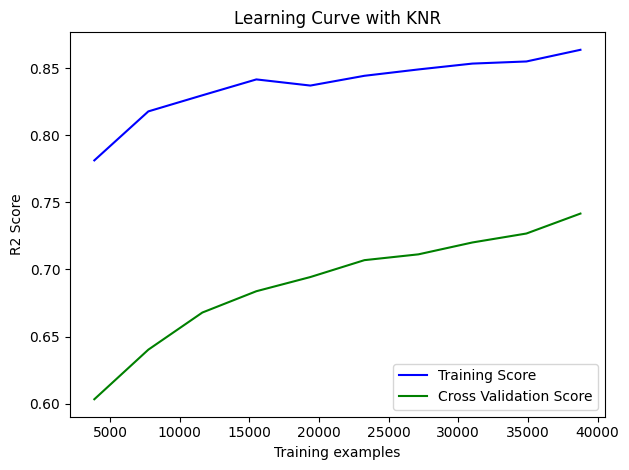

In [16]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 4-fold cross validation
train_sizes, train_score, val_score = learning_curve(KNeighborsRegressor(n_neighbors=4,weights= 'uniform'), X_train, y_train,
                                          cv=20, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2",n_jobs=-1)

train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)

val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)

plt.plot(train_sizes, train_score_mean,
         label="Training Score", color='b')
plt.plot(train_sizes, val_score_mean,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Learning Curve with KNR")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45343 entries, 0 to 45342
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bhk           45343 non-null  int64  
 1   area          45343 non-null  int64  
 2   region        45343 non-null  int64  
 3   status        45343 non-null  int64  
 4   price_in_USD  45343 non-null  float64
 5   house_type    45343 non-null  int64  
 6   new           45343 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.4 MB
